# Explore here

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from pickle import dump

# URL of the CSV file
url = 'https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv'

# Read the CSV file from the URL and save it as a DataFrame
df = pd.read_csv(url, delimiter=',')

print("CSV file has been downloaded and saved as a DataFrame.")# Your code here

CSV file has been downloaded and saved as a DataFrame.


#### package_name. Name of the mobile application (categorical)
#### review. Comment about the mobile application (categorical)
#### polarity. Class variable (0 or 1), being 0 a negative comment and 1, positive (categorical numeric)

In [133]:
print(df.head())
print(df.describe())
print(df.info())
print(df.shape)

          package_name                                             review  \
0  com.facebook.katana   privacy at least put some option appear offli...   
1  com.facebook.katana   messenger issues ever since the last update, ...   
2  com.facebook.katana   profile any time my wife or anybody has more ...   
3  com.facebook.katana   the new features suck for those of us who don...   
4  com.facebook.katana   forced reload on uploading pic on replying co...   

   polarity  
0         0  
1         0  
2         0  
3         0  
4         0  
         polarity
count  891.000000
mean     0.344557
std      0.475490
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   package_name  891 non-null    object
 1   review        891 non-null    object
 2   polarity      

In [134]:
print(df.isnull().sum())
print(df.value_counts())    

package_name    0
review          0
polarity        0
dtype: int64
package_name                review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             polarity
com.Slack                    better than groupme đ                                                                                                                                                                                                                                                                        

In [135]:
#I want to drop package_name
df = df.drop(columns=['package_name'])

In [136]:
df["review"] = df['review'].str.strip().str.lower() #strip and lower the review column to make it easier to work with

In [137]:
#Now, let's split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['polarity']), df['polarity'], test_size=0.2, random_state=42)


print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())


                                                review
331  just did the latest update on viber and yet ag...
733  keeps crashing it only works well in extreme d...
382  the fail boat has arrived the 6.0 version is t...
704  superfast, just as i remember it ! opera mini ...
813  installed and immediately deleted this crap i ...
                                                review
709  love/hate has bug and security issues. i tried...
439  whatsapp i use this app now that blackberry me...
840                           usefully verry  nice app
720  fonts why in the heck is this thing analysing ...
39   app doesn't work after latest upgrade the face...
331    0
733    0
382    0
704    1
813    1
Name: polarity, dtype: int64
709    0
439    1
840    1
720    0
39     0
Name: polarity, dtype: int64


In [138]:
vec_model = CountVectorizer(stop_words = "english")

X_train = vec_model.fit_transform(X_train['review']).toarray()
X_test = vec_model.transform(X_test['review']).toarray()

In [139]:
print(X_train.sum())
print(X_test.sum())

14536
3099


In [152]:
cross_val_scores = {
    'Model': [],
    'Score' : []
}


In [153]:


model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [154]:
y_pred = model.predict(X_test) 
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [155]:
accuracy_score(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=7, n_jobs=-1)

cross_val_scores['Model'].extend(['BernoulliNB']*7)
cross_val_scores['Score'].extend(scores)

print(f'Cross-validation accuracy: {np.mean(scores)} +/- {np.std(scores)}')

Cross-validation accuracy: 0.7583686940122583 +/- 0.030250103112257662


In [156]:
model = MultinomialNB()
model.fit(X_train, y_train)



MultinomialNB()

In [157]:
y_pred = model.predict(X_test) 
y_pred 

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0])

In [158]:
accuracy_score(y_test, y_pred)
scores = cross_val_score(model, X_train, y_train, cv=7, n_jobs=-1)

cross_val_scores['Model'].extend(['MultinomialNB']*7)
cross_val_scores['Score'].extend(scores)

print(f'Cross-validation accuracy: {np.mean(scores)} +/- {np.std(scores)}')

Cross-validation accuracy: 0.8159580663948747 +/- 0.0388888979842913


In [159]:
model = GaussianNB()
model.fit(X_train, y_train)



GaussianNB()

In [160]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0])

In [161]:
accuracy_score(y_test, y_pred)

scores = cross_val_score(model, X_train, y_train, cv=7, n_jobs=-1)

cross_val_scores['Model'].extend(['GaussianNB']*7)
cross_val_scores['Score'].extend(scores)

print(f'Cross-validation accuracy: {np.mean(scores)} +/- {np.std(scores)}')

Cross-validation accuracy: 0.7709598690961533 +/- 0.02961196427560914


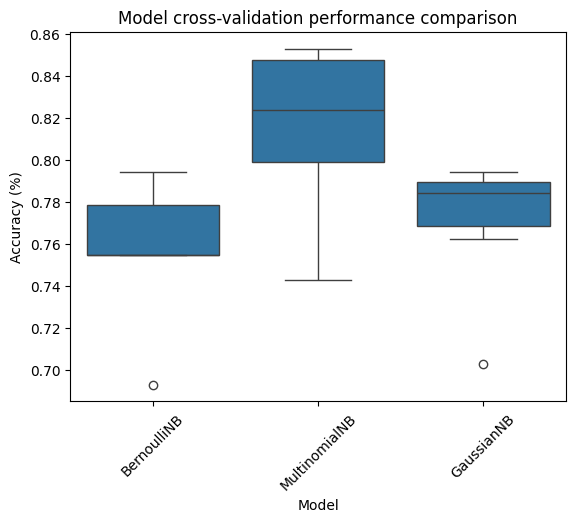

In [162]:
# Plot the cross-validation scores
sns.boxplot(pd.DataFrame.from_dict(cross_val_scores), x='Model', y='Score')
plt.title('Model cross-validation performance comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
dump(model, open("naive_bayes_model.pkl", "wb")) 